In [2]:
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
dfTrain = pd.read_csv("Train.csv")
dfTrain.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [4]:
dfTrain.columns

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category'],
      dtype='object')

In [5]:
dfTrain.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category             object
dtype: object

In [6]:
dfTrain.shape

(18506, 21)

In [7]:
dfTrain.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,18504.000000,18500.000000,18506.000000,18506.000000
mean,0.936230,0.998757,9.141576,2.493516
std,1.215582,1.173177,14.127449,5.275156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000
75%,1.000000,1.000000,11.000000,4.000000
max,49.000000,58.000000,365.000000,240.000000


In [8]:
import seaborn as sns
import matplotlib as plt

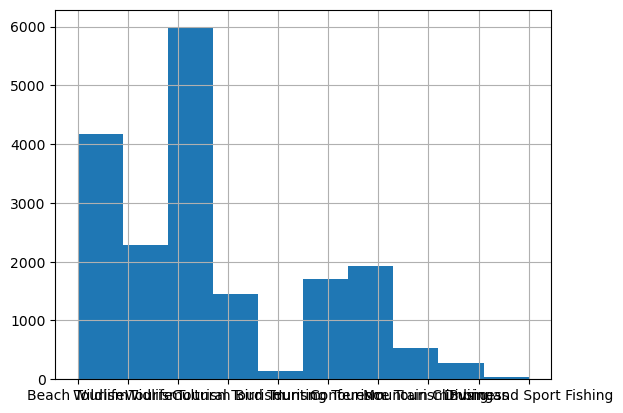

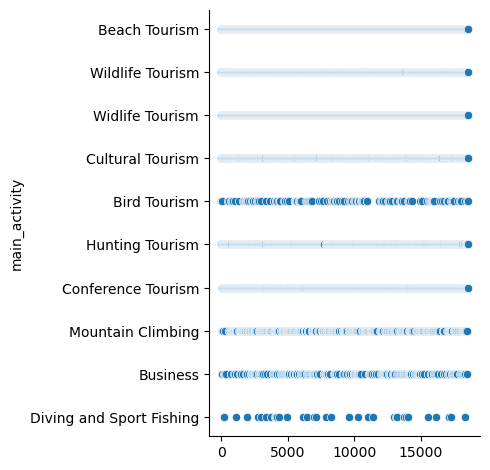

In [9]:
train_hist = dfTrain['main_activity'].hist()
# train_hist
# fig = plt.figure(figsize=(8,6))
sns.relplot(data=dfTrain['main_activity'])
# plt.show()

In [10]:
### exploring info source

dfTrain['info_source'].head()

### basically where each traveler got their information for their trip.

0             Friends, relatives
1    Travel agent, tour operator
2    Travel agent, tour operator
3                 Radio, TV, Web
4    Travel agent, tour operator
Name: info_source, dtype: object

<AxesSubplot: >

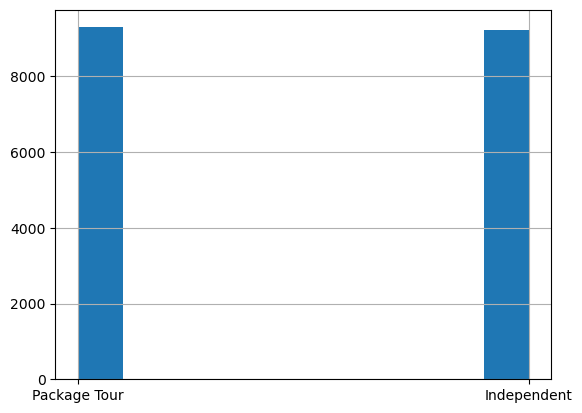

In [11]:
### exploring tour arrangements

dfTrain['tour_arrangement'].hist()

### how they are traveling, with a tourism agency, tour package or independent
### there are only to unique values: Package Tour or Independent
### we could change this to a bianry represenation since there are only two values.

In [12]:
### unique values of the total_female column
dfTrain['total_female'].unique()

array([ 0.,  1.,  3.,  2.,  4., 49.,  5.,  6.,  7., 10., 13., 14.,  8.,
       15., 20., 17., 11., 12., 24.,  9., 22., nan, 26., 19., 23.])

In [13]:
### which two rows have null values
dfTrain.loc[dfTrain['total_female'].isnull()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
7627,tour_idsgxazh59,FRANCE,25-44,With Other Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,9,5,Yes,Lower Cost
8388,tour_id1kmucs2v,ITALY,18-24,With Other Friends/Relatives,NaN,4.0,Volunteering,Wildlife Tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,15,0,Yes,High Cost


In [14]:
dfTrain['total_male'].unique()

array([ 2.,  1.,  0.,  8.,  4.,  5.,  3., 44.,  7.,  6., 14., 10., 12.,
       15., 24., 11.,  9., 58., nan, 13., 40., 23., 20., 17., 25.])

In [15]:
### finding the 6 males that have null values
dfTrain.loc[dfTrain['total_male'].isnull()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
6195,tour_idcfe5lv3z,SOUTH AFRICA,25-44,With Other Friends/Relatives,0.0,NaN,Meetings and Conference,Wildlife Tourism,"Newspaper, magazines, brochures",Independent,...,No,No,No,No,No,No,4,0,Yes,Normal Cost
7092,tour_idzmkp9sq6,CHINA,25-44,With Other Friends/Relatives,10.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,4,2,Yes,Highest Cost
9350,tour_idgxm5bafr,SPAIN,45-64,With Other Friends/Relatives,7.0,NaN,Other,Hunting Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,Yes,11,0,No,Highest Cost
9571,tour_idaqxaa6li,FRANCE,25-44,NaN,0.0,NaN,Leisure and Holidays,Conference Tourism,"Radio, TV, Web",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,6,0,Yes,Normal Cost
13076,tour_id7rzn4czm,GERMANY,45-64,With Other Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,23,0,No,Higher Cost
15585,tour_id41dez9e2,NETHERLANDS,45-64,With Other Friends/Relatives,11.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,No,Yes,No,No,Yes,No,5,0,Yes,Higher Cost


In [16]:
### exploring package transport int

dfTrain['package_transport_int'].unique()

### create a binary representation
dfTrain['package_transport_int'] = dfTrain['package_transport_int'].replace('Yes', 1)
dfTrain['package_transport_int'] = dfTrain['package_transport_int'].replace('No', 0)

### cleaned data
# dfTrain['package_transport_int'][['Tour_ID', 'country', 'age_group','package_transport_int']]
# dfTrain.loc[dfTrain['package_transport_int'] == 1, ["Tour_ID", "package_transport_int"]]
dfTrain['package_transport_int'].head()

0    1
1    1
2    1
3    0
4    1
Name: package_transport_int, dtype: int64

In [17]:
### package accomodation

dfTrain['package_accomodation'] = dfTrain["package_accomodation"].replace('Yes',1)

dfTrain['package_accomodation'] = dfTrain["package_accomodation"].replace('No',0)

dfTrain['package_accomodation']

0        1
1        1
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    1
18505    0
Name: package_accomodation, Length: 18506, dtype: int64

In [18]:
dfTrain['package_food'] = dfTrain['package_food'].replace('Yes',1)
dfTrain['package_food'] = dfTrain['package_food'].replace('No',0)

dfTrain['package_food']

0        1
1        1
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    1
18505    0
Name: package_food, Length: 18506, dtype: int64

In [19]:
dfTrain['package_transport_tz'] = dfTrain['package_transport_tz'].replace('Yes',1)
dfTrain['package_transport_tz'] = dfTrain['package_transport_tz'].replace('No',0)

dfTrain['package_transport_tz']

0        1
1        1
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    1
18505    0
Name: package_transport_tz, Length: 18506, dtype: int64

In [20]:
dfTrain['package_sightseeing'].unique()

### since this column has a boolean representation, I will clean this column by replacing the 'No' with a 0
###  and the 'Yes' with a 1.
dfTrain['package_sightseeing'] = dfTrain['package_sightseeing'].replace('Yes',1)
dfTrain['package_sightseeing'] = dfTrain['package_sightseeing'].replace('No',0)
dfTrain['package_sightseeing']

0        0
1        0
2        1
3        0
4        0
        ..
18501    0
18502    0
18503    0
18504    1
18505    0
Name: package_sightseeing, Length: 18506, dtype: int64

In [21]:
dfTrain['package_guided_tour'].unique()
### binary representation
dfTrain['package_guided_tour'] = dfTrain["package_guided_tour"].replace('Yes',1)
dfTrain['package_guided_tour'] = dfTrain["package_guided_tour"].replace('No',0)
dfTrain['package_guided_tour']

0        0
1        0
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    1
18505    0
Name: package_guided_tour, Length: 18506, dtype: int64

In [22]:
dfTrain['package_insurance'] = dfTrain['package_insurance'].replace('Yes',1)
dfTrain['package_insurance'] = dfTrain['package_insurance'].replace('No',0)

dfTrain['package_insurance']

0        0
1        0
2        0
3        0
4        1
        ..
18501    0
18502    0
18503    0
18504    0
18505    0
Name: package_insurance, Length: 18506, dtype: int64

In [23]:
dfTrain['travel_with'].fillna(dfTrain['travel_with'].mode()[0], inplace=True)
dfTrain.loc[dfTrain['travel_with'].isnull()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category


<AxesSubplot: xlabel='night_mainland', ylabel='travel_with'>

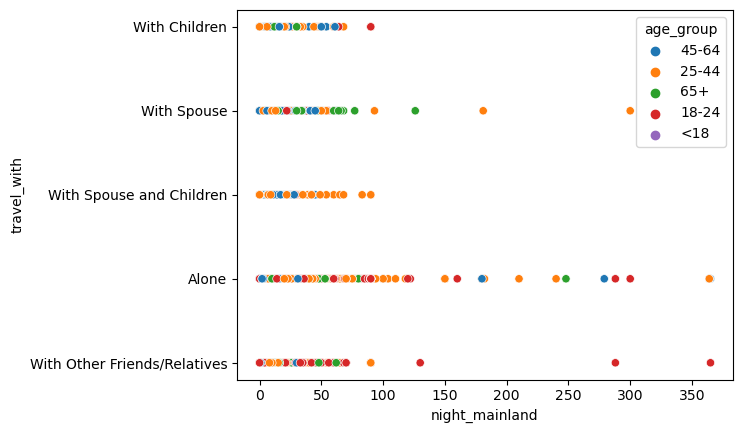

In [24]:
dfTrain['night_mainland']
sns.scatterplot(data=dfTrain, x='night_mainland', y='travel_with', hue='age_group')

<AxesSubplot: xlabel='night_zanzibar', ylabel='travel_with'>

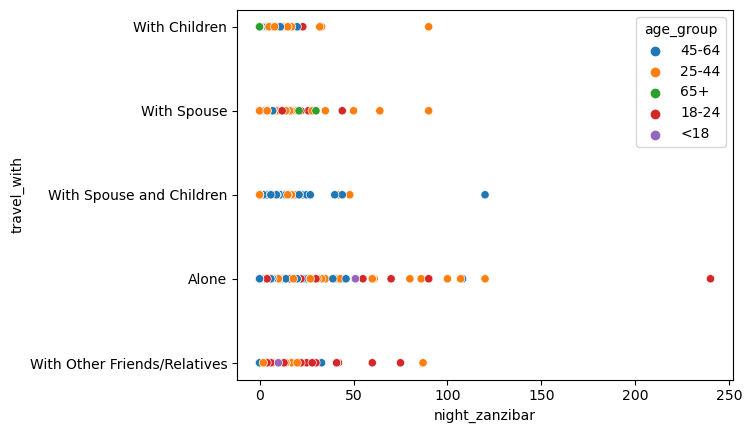

In [25]:
dfTrain['night_zanzibar']
sns.scatterplot(data=dfTrain, x='night_zanzibar', y='travel_with', hue='age_group')

In [26]:
dfTrain['first_trip_tz'].unique()

dfTrain['first_trip_tz'] = dfTrain['first_trip_tz'].replace('Yes',1)
dfTrain['first_trip_tz'] = dfTrain['first_trip_tz'].replace('No',0)

dfTrain['first_trip_tz']

0        1
1        1
2        1
3        0
4        1
        ..
18501    0
18502    0
18503    1
18504    0
18505    0
Name: first_trip_tz, Length: 18506, dtype: int64

In [27]:
dfTrain.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int      int64
package_accomodation       int64
package_food               int64
package_transport_tz       int64
package_sightseeing        int64
package_guided_tour        int64
package_insurance          int64
night_mainland             int64
night_zanzibar             int64
first_trip_tz              int64
cost_category             object
dtype: object

In [28]:
dfCost = pd.get_dummies(dfTrain['cost_category'])
dfCost

,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
18501,0,0,0,0,1,0
18502,0,0,0,0,1,0
18503,0,1,0,0,0,0
18504,0,1,0,0,0,0


In [29]:
dfTour = pd.get_dummies(dfTrain['tour_arrangement'])
dfTour

,Independent,Package Tour
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
18501,1,0
18502,1,0
18503,1,0
18504,0,1


In [30]:
dfTrain = pd.concat([dfTrain,dfTour],axis=1)
dfTrain

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category,Independent,Package Tour
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,1,0,0,0,0,7,1,High Cost,0,1
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,1,0,0,0,0,7,1,High Cost,0,1
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,1,1,1,0,6,6,1,Higher Cost,0,1
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,0,0,0,0,3,0,0,Lower Cost,1,0
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,1,0,1,1,7,0,1,Higher Cost,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,tour_idmp5ciw50,KENYA,45-64,Alone,0.0,1.0,Other,Hunting Tourism,Others,Independent,...,0,0,0,0,3,0,0,Lower Cost,1,0
18502,tour_ideq0yncfs,KENYA,45-64,Alone,1.0,0.0,Meetings and Conference,Wildlife Tourism,Others,Independent,...,0,0,0,0,2,0,0,Lower Cost,1,0
18503,tour_idv7pz3vs8,UNITED STATES OF AMERICA,25-44,With Spouse and Children,2.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Independent,...,0,0,0,0,9,0,1,Higher Cost,1,0
18504,tour_idy6ydo00w,UNITED STATES OF AMERICA,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Conference Tourism,"Radio, TV, Web",Package Tour,...,1,1,1,0,13,4,0,Higher Cost,0,1


In [31]:
# dfTrain = dfTrain.drop('tour_arrangement',axis=0)
dfTrain.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category,Independent,Package Tour
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,1,0,0,0,0,7,1,High Cost,0,1
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,1,0,0,0,0,7,1,High Cost,0,1
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,1,1,1,0,6,6,1,Higher Cost,0,1
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,0,0,0,0,3,0,0,Lower Cost,1,0
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,1,0,1,1,7,0,1,Higher Cost,0,1


In [32]:
dfTrain = pd.concat([dfTrain,dfCost],axis=1)
# dfTrain = dfTrain.drop('Normal Cost',axis=1)
dfTrain.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,first_trip_tz,cost_category,Independent,Package Tour,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,1,High Cost,0,1,1,0,0,0,0,0
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,1,High Cost,0,1,1,0,0,0,0,0
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,1,Higher Cost,0,1,0,1,0,0,0,0
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,0,Lower Cost,1,0,0,0,0,0,1,0
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,1,Higher Cost,0,1,0,1,0,0,0,0


In [35]:
### creating categorial data as numerical
# pd.get_dummies(dfTrain['country'])
# dfCost = pd.get_dummies(dfTrain['cost_category'])
# dfTour = pd.get_dummies(dfTrain['tour_arrangement'])
# dfTrain = pd.concat([dfTrain,dfTour],axis=1)
dfTrain = dfTrain.drop('tour_arrangement',axis=1)
# dfTrain = pd.concat([dfTrain,dfCost],axis=1)
dfTrain = dfTrain.drop('cost_category',axis=1)
# dfTrain.to_csv('./filename.csv')
dfTrain

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,package_transport_int,...,night_zanzibar,first_trip_tz,Independent,Package Tour,High Cost,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",1,...,7,1,0,1,1,0,0,0,0,0
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",1,...,7,1,0,1,1,0,0,0,0,0
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",1,...,6,1,0,1,0,1,0,0,0,0
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",0,...,0,0,1,0,0,0,0,0,1,0
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",1,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,tour_idmp5ciw50,KENYA,45-64,Alone,0.0,1.0,Other,Hunting Tourism,Others,0,...,0,0,1,0,0,0,0,0,1,0
18502,tour_ideq0yncfs,KENYA,45-64,Alone,1.0,0.0,Meetings and Conference,Wildlife Tourism,Others,0,...,0,0,1,0,0,0,0,0,1,0
18503,tour_idv7pz3vs8,UNITED STATES OF AMERICA,25-44,With Spouse and Children,2.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",0,...,0,1,1,0,0,1,0,0,0,0
18504,tour_idy6ydo00w,UNITED STATES OF AMERICA,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Conference Tourism,"Radio, TV, Web",1,...,4,0,0,1,0,1,0,0,0,0


In [64]:
dfAge = pd.get_dummies(dfTrain['age_group'])

In [65]:
dfTravelW = pd.get_dummies(dfTrain['travel_with'])

In [67]:
# dfTrain = pd.concat([dfTrain,dfAge],axis=1)
dfTrain.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,package_transport_int,...,Higher Cost,Highest Cost,Low Cost,Lower Cost,Normal Cost,18-24,25-44,45-64,65+,<18
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",1,...,0,0,0,0,0,0,0,1,0,0
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",1,...,0,0,0,0,0,0,1,0,0,0
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",1,...,1,0,0,0,0,0,0,0,1,0
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",0,...,0,0,0,1,0,0,1,0,0,0
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",1,...,1,0,0,0,0,0,0,1,0,0


In [68]:
# dfTrain = pd.concat([dfTrain,dfTravelW],axis=1)
dfTrain.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,package_transport_int,...,18-24,25-44,45-64,65+,<18,Alone,With Children,With Other Friends/Relatives,With Spouse,With Spouse and Children
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",1,...,0,0,1,0,0,0,1,0,0,0
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",1,...,0,1,0,0,0,0,0,0,1,0
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",1,...,0,0,0,1,0,0,0,0,1,0
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",0,...,0,1,0,0,0,0,0,0,0,1
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",1,...,0,0,1,0,0,1,0,0,0,0


In [69]:
dfTrain.dtypes

Tour_ID                          object
country                          object
age_group                        object
travel_with                      object
total_female                    float64
total_male                      float64
purpose                          object
main_activity                    object
info_source                      object
package_transport_int             int64
package_accomodation              int64
package_food                      int64
package_transport_tz              int64
package_sightseeing               int64
package_guided_tour               int64
package_insurance                 int64
night_mainland                    int64
night_zanzibar                    int64
first_trip_tz                     int64
Independent                       uint8
Package Tour                      uint8
High Cost                         uint8
Higher Cost                       uint8
Highest Cost                      uint8
Low Cost                          uint8


In [157]:
X = dfTrain[['package_transport_int','package_accomodation','Alone','With Children','With Other Friends/Relatives','With Spouse','With Spouse and Children','<18','65+','45-64','25-44','18-24']]
y = dfTrain['High Cost']
# X

In [158]:
### split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [159]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)
# X_test

In [160]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [161]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [156]:
accuracy_score(y_test,y_pred)

0.7987574284170719

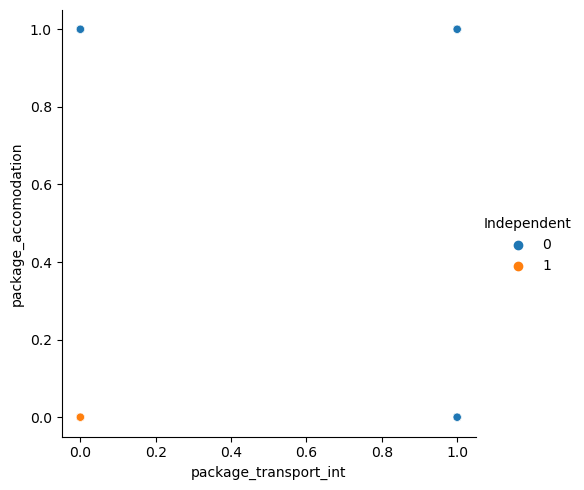

In [63]:
sns.relplot(data=dfTrain,x='package_transport_int',y='package_accomodation', hue='Independent')

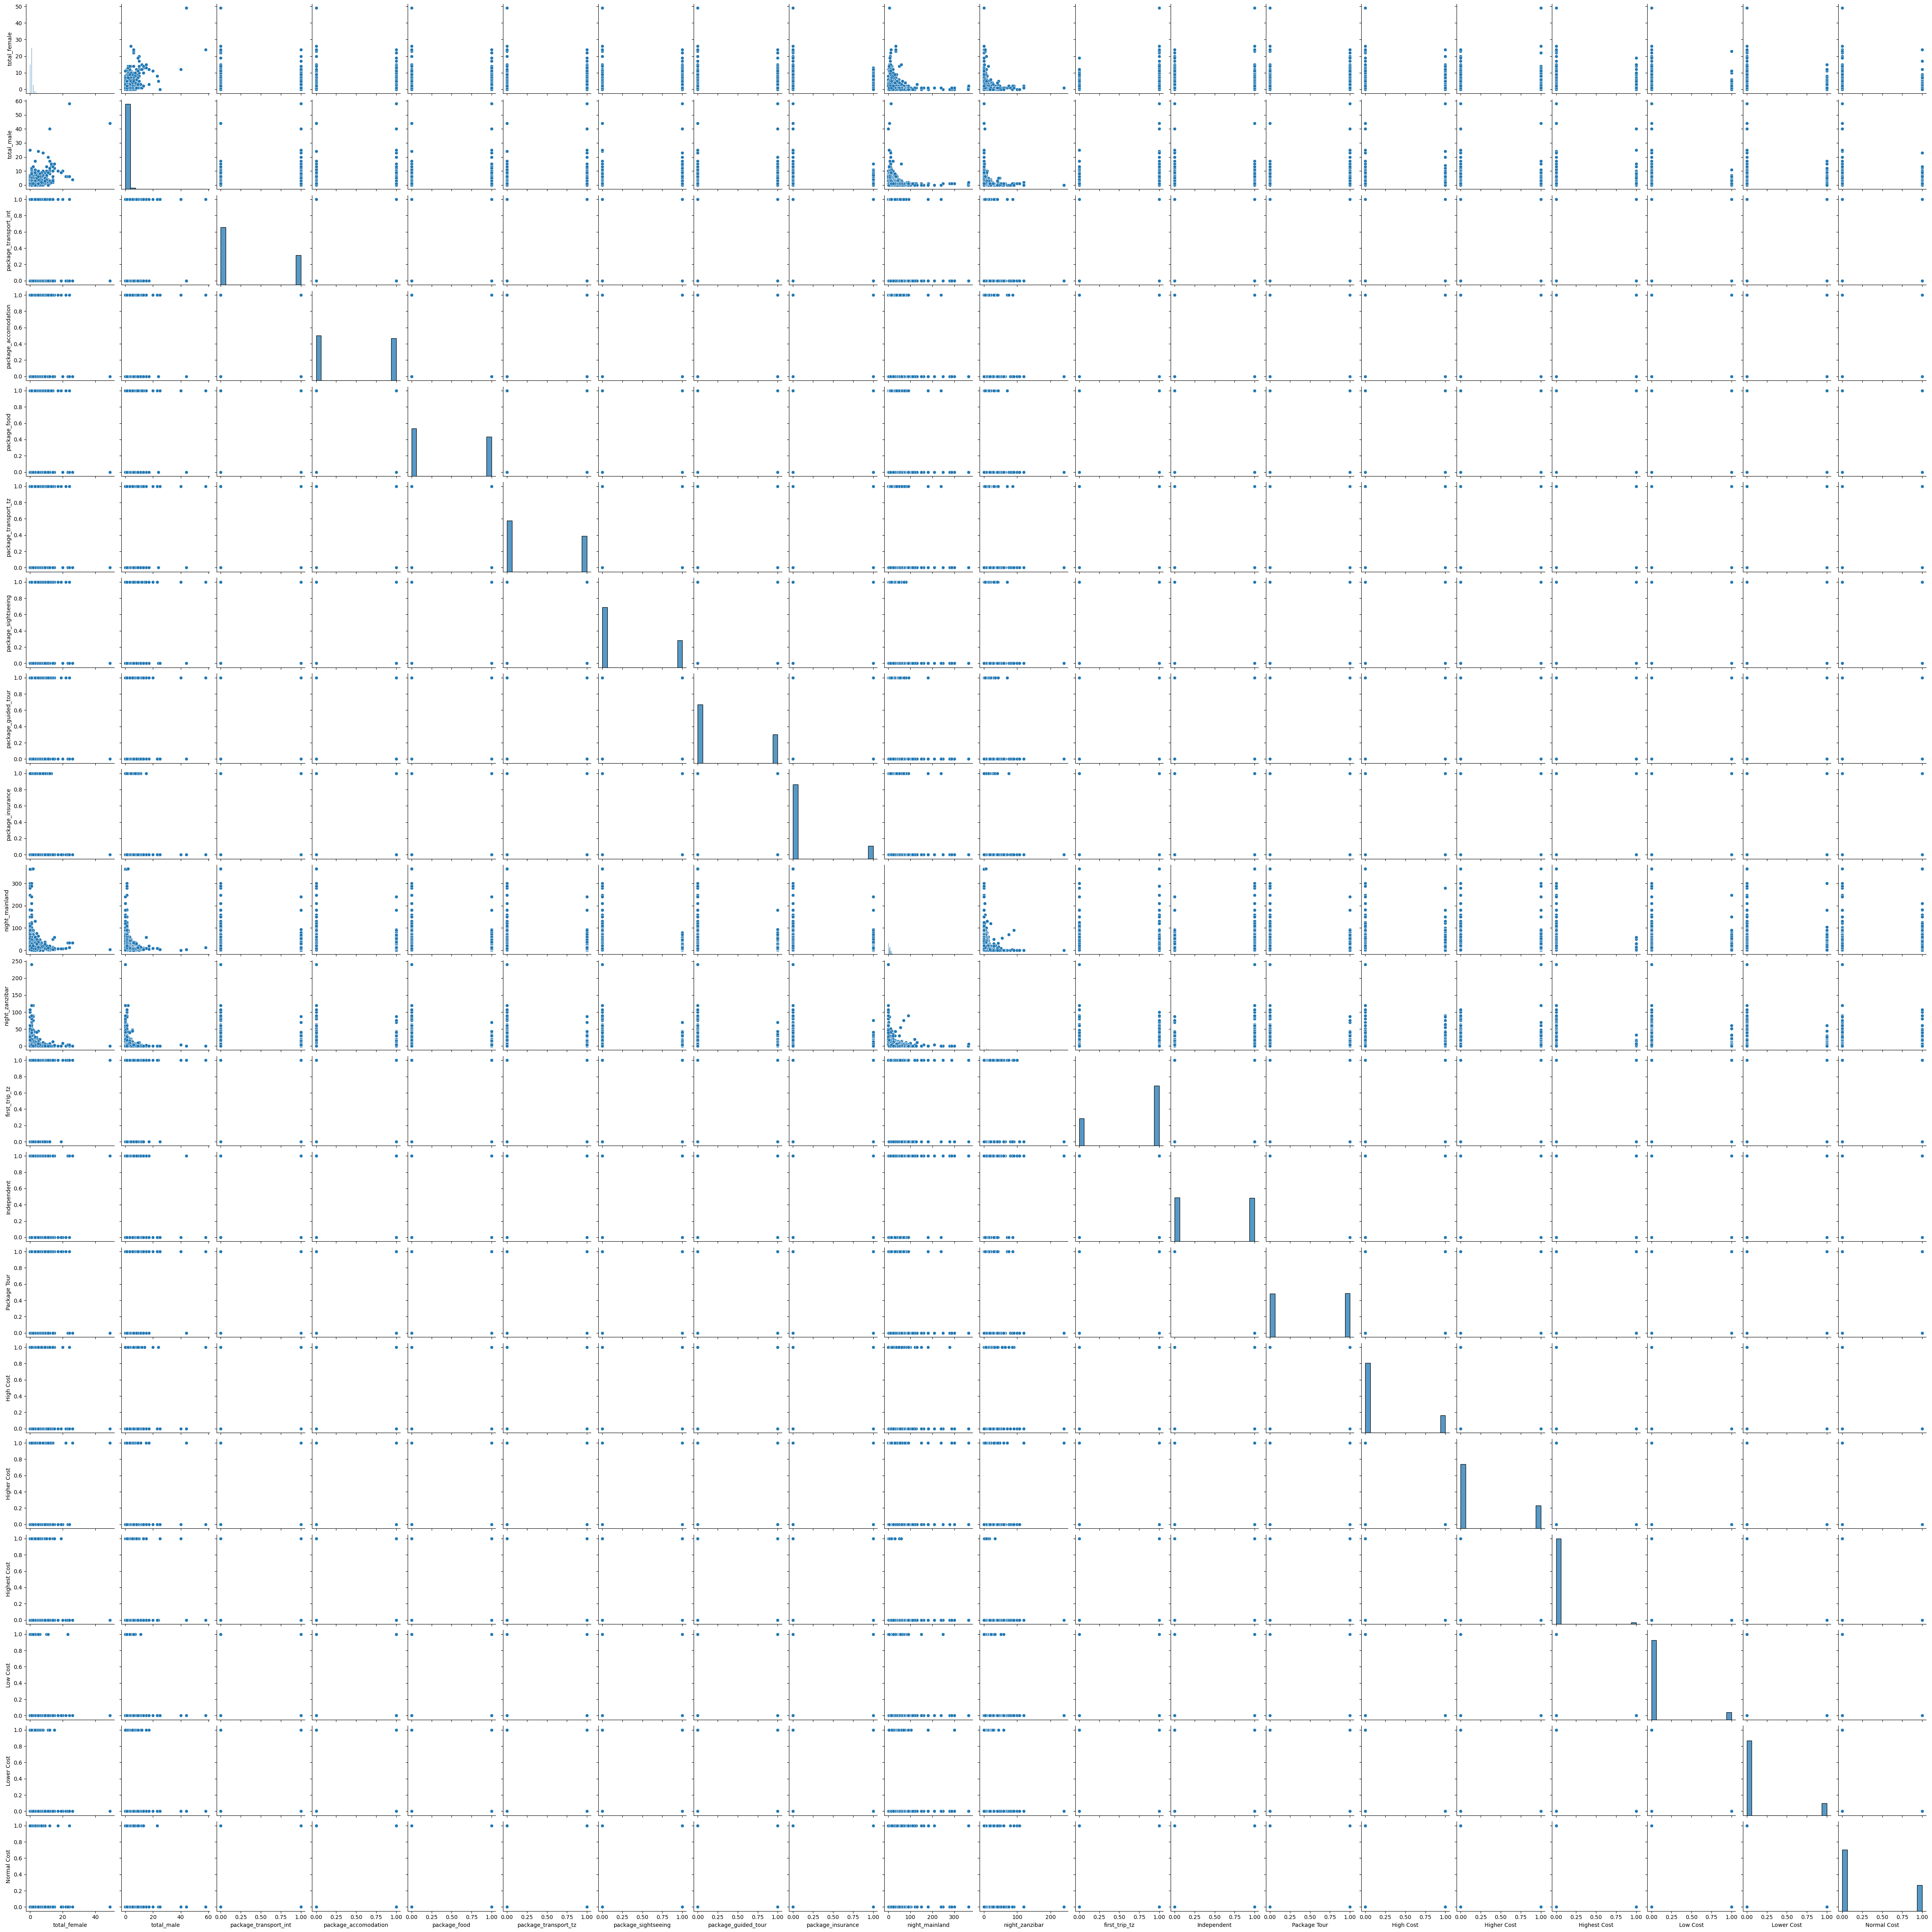

In [41]:
sns.pairplot(dfTrain)

In [92]:
### before fitting the data we have to scale the data appropriately

X = dfTrain[['package_transport_int','package_accomodation','package_food','package_transport_tz','package_guided_tour','package_insurance','night_mainland','first_trip_tz','Independent','Package Tour']]
y = dfTrain['High Cost']

In [109]:
### creating a model
# X = dfTrain[['package_transport_int','package_accomodation','package_food','package_transport_tz','package_guided_tour','package_insurance','night_mainland','first_trip_tz','Independent','Package Tour']]
# y = dfTrain[['High Cost','Higher Cost','Low Cost','Lower Cost','Normal Cost']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)

y_train

6562     1
14003    1
13962    0
12435    0
16466    0
        ..
153      0
866      0
74       1
14512    0
338      0
Name: High Cost, Length: 14804, dtype: uint8

In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_train
X_test = scaler.transform(X_test)
# y_train.shape

In [111]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [112]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [113]:
accuracy_score(y_test,model.predict(X_test))

0.7987574284170719

In [ ]:
### does an independent typically spend less on packages or night_land?
len(dfTrain.loc[dfTrain['tour_arrangement']=='Independent']) ### 9211
len(dfTrain.loc[(dfTrain['tour_arrangement'] =='Independent') & (dfTrain['package_accomodation'] == 0)]) ### 9104

data redundancy by eliminating the columns that have very similar values.
do some  research about the tourism in tansania.
generating features


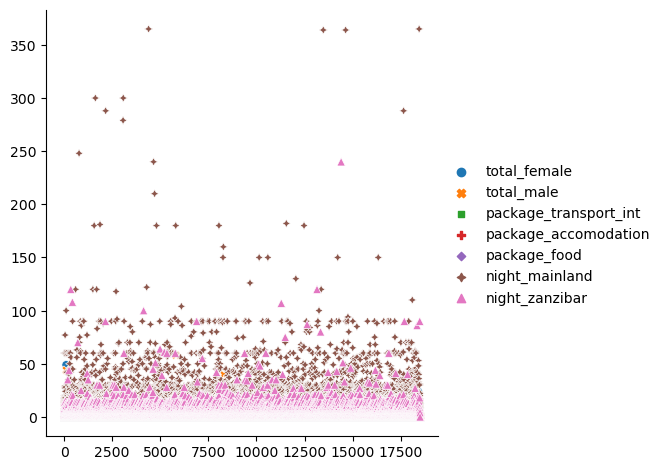

In [25]:
sns.relplot(data=dfTrain)